In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=e112ab8c6daf7c674f593dc5121b52b4a0dca105b9a28df5026d81b34acbd074
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Row(vm_id='1', vm_size='Standard_F8s_v2', cpu_usage_percent='88.76', memory_usage_gb='18.02', runtime_hours='12.06', power_consumption_kw='1.54', region='Southeast Asia', Date='1/1/2024', Business Segment='Investment Banking', Carbon_Emission='4.3273692')


In [ ]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Generate a date range with enough data points
date_range = pd.date_range(start='2024-01-01', periods=45000, freq='D')  # Hourly frequency

# Define attributes
vm_ids = [f'vm_{i}' for i in range(1, 101)]  # 100 unique VM IDs
vm_sizes = ['Standard_F8s_v2', 'Standard_D2s_v3', 'Standard_B1s']
regions = ['East US', 'West Europe', 'Southeast Asia', 'Australia East']
business_segments = ['Investment Banking', 'Investment Banking','Investment Banking','Investment Banking','Asset Management', 'Wealth Management', 'Wealth Management','Wealth Management','Personal Banking']

# Generate synthetic data for attributes
vm_id = np.random.choice(vm_ids, len(date_range))
vm_size = np.random.choice(vm_sizes, len(date_range))
cpu_usage_percent = np.random.uniform(10, 100, len(date_range))  # Percentage
memory_usage_gb = np.random.uniform(1, 64, len(date_range))  # GB
runtime_hours = np.random.uniform(1, 24, len(date_range))  # in hours
power_consumption_kw = np.random.uniform(0.5, 5.0, len(date_range))  # in kW
region = np.random.choice(regions, len(date_range))
business_segment = np.random.choice(business_segments, len(date_range))

# Calculate carbon emission based on synthetic formula
# Example formula: carbon emission = power consumption * runtime hours * emission factor
emission_factor = 0.5  # kg CO2 per kWh, this is a simplified assumption
carbon_emission = power_consumption_kw * runtime_hours * emission_factor

# Create a DataFrame
df = pd.DataFrame({
    'vm_id': vm_id,
    'vm_size': vm_size,
    'cpu_usage_percent': cpu_usage_percent,
    'memory_usage_gb': memory_usage_gb,
    'runtime_hours': runtime_hours,
    'power_consumption_kw': power_consumption_kw,
    'region': region,
    'Date': date_range,
    'Business Segment': business_segment,
    'Carbon_Emission': carbon_emission
})

# Save the DataFrame to a CSV file
df.to_csv('/content/drive/My Drive/Colab Notebooks/azure_vm_carbon_emissions.csv', index=False)

# Display the first few rows to verify
print(df.head())


   vm_id          vm_size  cpu_usage_percent  memory_usage_gb  runtime_hours  \
0  vm_52  Standard_F8s_v2          52.101835        13.284601       4.012393   
1  vm_93  Standard_D2s_v3          11.156053        34.145258      20.996061   
2  vm_15  Standard_F8s_v2          55.501966        26.032607       9.333522   
3  vm_72  Standard_F8s_v2          22.035224        61.391999       7.189589   
4  vm_61     Standard_B1s          60.973609        27.166059       8.539238   

   power_consumption_kw          region       Date    Business Segment  \
0              3.554928         East US 2024-01-01  Investment Banking   
1              4.207372     West Europe 2024-01-02  Investment Banking   
2              3.346981     West Europe 2024-01-03    Asset Management   
3              0.624463     West Europe 2024-01-04    Asset Management   
4              1.671819  Australia East 2024-01-05  Investment Banking   

   Carbon_Emission  
0         7.131884  
1        44.169116  
2        15

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


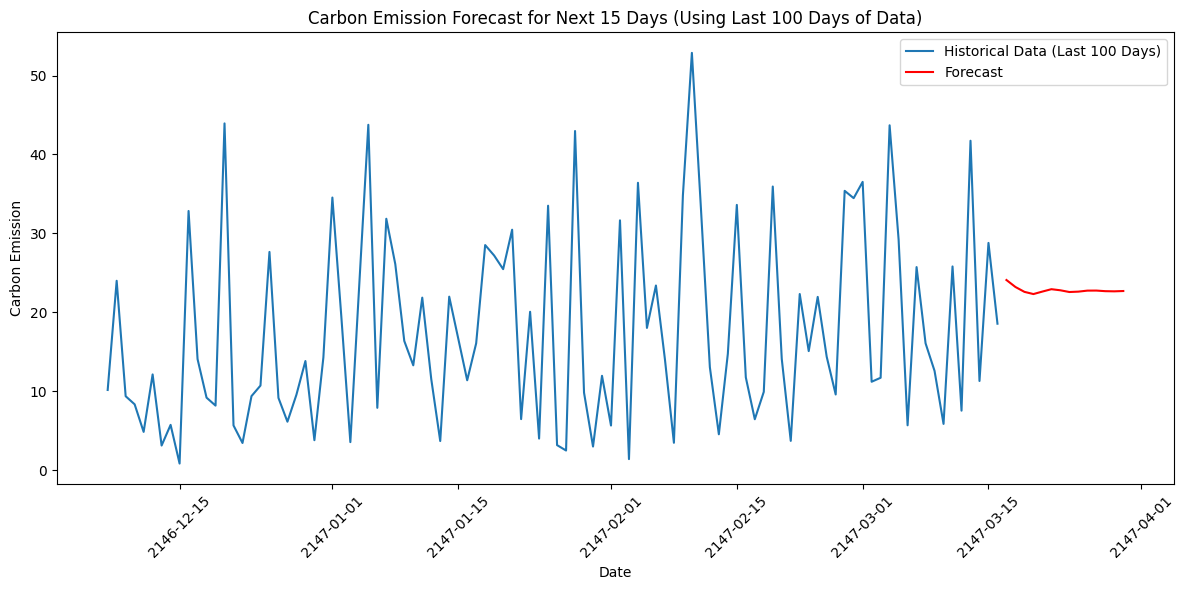

,Forecast
2147-03-16,NaN
2147-03-17,24.099565
2147-03-18,23.216732
2147-03-19,22.600159
2147-03-20,22.320502
2147-03-21,22.637194
2147-03-22,22.937406
2147-03-23,22.798468
2147-03-24,22.579896
2147-03-25,22.628494


In [ ]:
# Use only the last 100 days of data for faster model fitting
df_subset = df.tail(100)

# Fit an ARIMA model to the subset of Carbon_Emission data
# Using (p, d, q) = (5, 1, 0) as an example, this may need tuning for better performance
model_subset = ARIMA(df_subset['Carbon_Emission'], order=(5, 1, 0))
model_fit_subset = model_subset.fit()

# Forecast for the next 15 days using the model fitted on the subset
forecast_subset = model_fit_subset.forecast(steps=15)

# Create a DataFrame for plotting the forecast
forecast_dates_subset = pd.date_range(start=df_subset.index[-1] + pd.Timedelta(days=1), periods=15, freq='D')
forecast_df_subset = pd.DataFrame({'Forecast': forecast_subset}, index=forecast_dates_subset)

# Plot historical data and forecast using the subset
plt.figure(figsize=(12, 6))
plt.plot(df_subset.index, df_subset['Carbon_Emission'], label='Historical Data (Last 100 Days)')
plt.plot(forecast_df_subset.index, forecast_df_subset['Forecast'], label='Forecast', color='red')
plt.title('Carbon Emission Forecast for Next 15 Days (Using Last 100 Days of Data)')
plt.xlabel('Date')
plt.ylabel('Carbon Emission')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Display the forecast DataFrame
forecast_df_subset


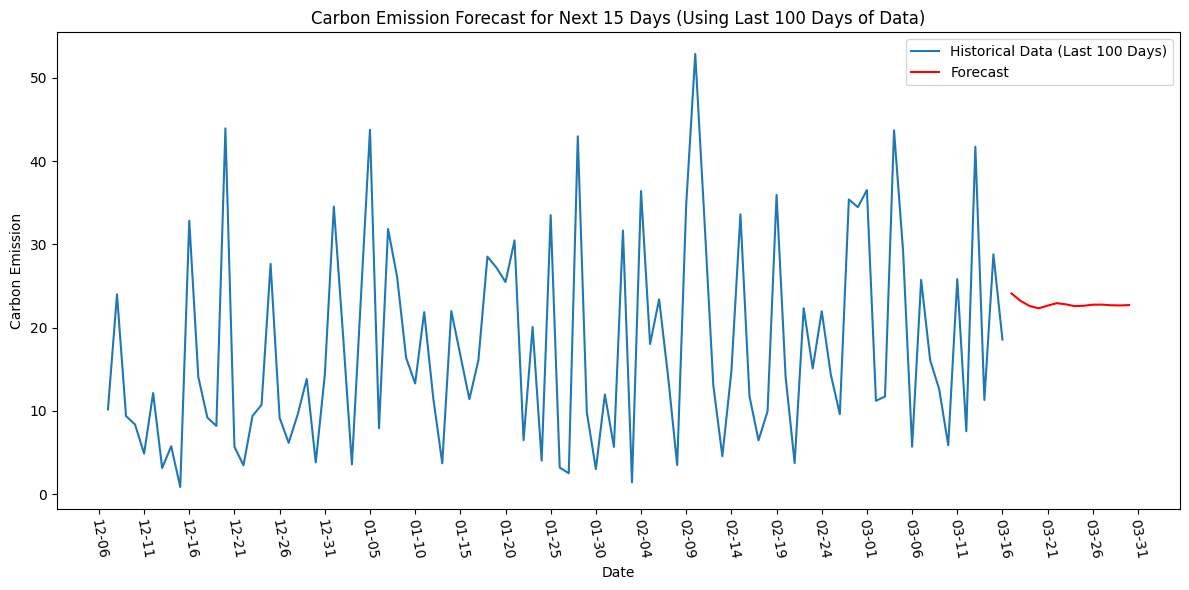

,Forecast
2147-03-16,NaN
2147-03-17,24.099565
2147-03-18,23.216732
2147-03-19,22.600159
2147-03-20,22.320502
2147-03-21,22.637194
2147-03-22,22.937406
2147-03-23,22.798468
2147-03-24,22.579896
2147-03-25,22.628494


In [52]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot historical data and forecast using the subset
plt.figure(figsize=(12, 6))
plt.plot(df_subset.index, df_subset['Carbon_Emission'], label='Historical Data (Last 100 Days)')
plt.plot(forecast_df_subset.index, forecast_df_subset['Forecast'], label='Forecast', color='red')
plt.title('Carbon Emission Forecast for Next 15 Days (Using Last 100 Days of Data)')
plt.xlabel('Date')
plt.ylabel('Carbon Emission')

# Set the x-axis format to show only the date
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Set locator to avoid overcrowding
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Show one tick per day, adjust as needed

plt.xticks(rotation=1000)
plt.legend()
plt.tight_layout()
plt.show()

# Display the forecast DataFrame
forecast_df_subset


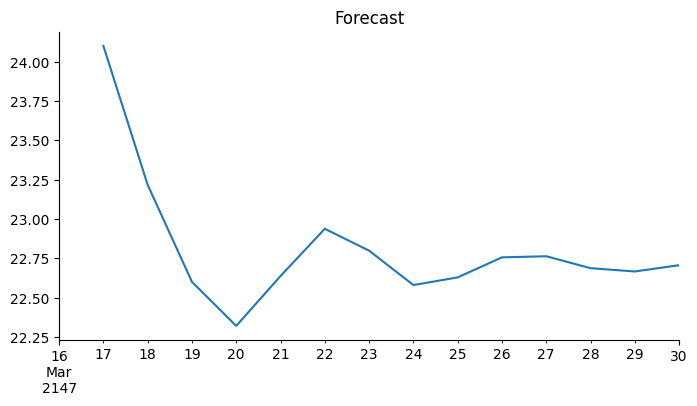

In [ ]:
# @title Forecast

from matplotlib import pyplot as plt
forecast_df_subset['Forecast'].plot(kind='line', figsize=(8, 4), title='Forecast')
plt.gca().spines[['top', 'right']].set_visible(False)

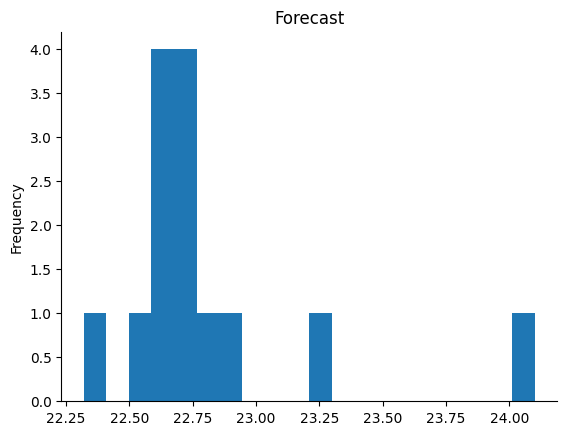

In [ ]:
# @title Forecast

from matplotlib import pyplot as plt
forecast_df_subset['Forecast'].plot(kind='hist', bins=20, title='Forecast')
plt.gca().spines[['top', 'right',]].set_visible(False)

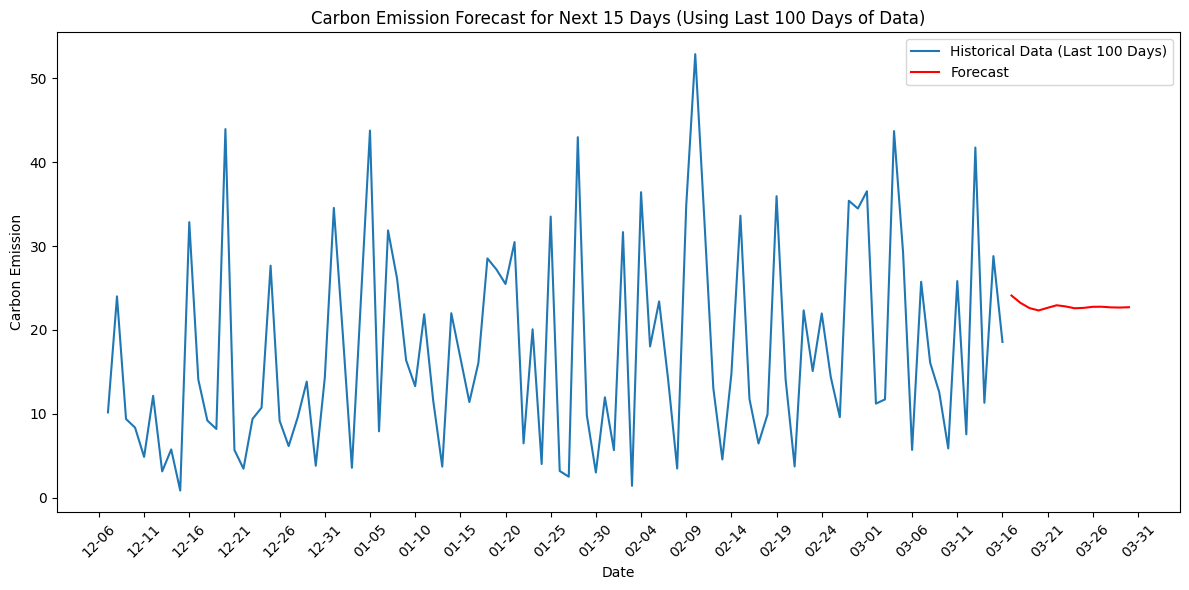

             Forecast
2147-03-16        NaN
2147-03-17  24.099565
2147-03-18  23.216732
2147-03-19  22.600159
2147-03-20  22.320502
2147-03-21  22.637194
2147-03-22  22.937406
2147-03-23  22.798468
2147-03-24  22.579896
2147-03-25  22.628494
2147-03-26  22.755926
2147-03-27  22.762830
2147-03-28  22.687122
2147-03-29  22.666172
2147-03-30  22.705986
Forecast data has been saved to 'carbon_emission_forecast.csv'


In [54]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot historical data and forecast using the subset
plt.figure(figsize=(12, 6))
plt.plot(df_subset.index, df_subset['Carbon_Emission'], label='Historical Data (Last 100 Days)')
plt.plot(forecast_df_subset.index, forecast_df_subset['Forecast'], label='Forecast', color='red')
plt.title('Carbon Emission Forecast for Next 15 Days (Using Last 100 Days of Data)')
plt.xlabel('Date')
plt.ylabel('Carbon Emission')

# Set the x-axis format to show only the date
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Set locator to avoid overcrowding
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Adjust as needed

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

# Display the forecast DataFrame
print(forecast_df_subset)

# Save the forecast data to a CSV file
forecast_df_subset.to_csv('/content/drive/My Drive/Colab Notebooks/carbon_emission_forecast.csv', index=True)

print("Forecast data has been saved to 'carbon_emission_forecast.csv'")
